# Lab | Making predictions with logistic regression


In this lab, you will be using the Sakila database of movie rentals.

In order to optimize our inventory, we would like to know which films will be rented next month and we are asked to create a model to predict it.

## Instructions


1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
2. Read the data into a Pandas dataframe.
3. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
4. Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.
5. Create a logistic regression model to predict this variable from the cleaned data.
6. Evaluate the results.

#### 1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
#### 2.Read the data into a Pandas dataframe.

In [22]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

password = getpass.getpass()

········


In [80]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''
select 
    f.film_id, 
    f.title,
    f.release_year,
    f.language_id,
    f.rental_duration,
    f.rental_rate,
    f.length,
    f.replacement_cost,
    f.rating,
    f.special_features,
    r.rental_id,
    r.rental_date,
    r.inventory_id,
    r.customer_id,
    r.return_date,
    r.staff_id,
    i.store_id,
    case when month(r.rental_date) = 2 AND YEAR(r.rental_date) = 2006 
            THEN 'True' 
            ELSE 'False' 
       END AS rented_feb_2006 
from sakila.inventory i
join sakila.film f on i.film_id = f.film_id
join sakila.rental r on i.inventory_id = r.inventory_id
;
'''

In [81]:
data = pd.read_sql_query(query,engine)
data

,film_id,title,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,store_id,rented_feb_2006
0,1,ACADEMY DINOSAUR,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",4863,2005-07-08 19:03:15,1,431,2005-07-11 21:29:15,2,1,False
1,1,ACADEMY DINOSAUR,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",11433,2005-08-02 20:13:10,1,518,2005-08-11 21:35:10,1,1,False
2,1,ACADEMY DINOSAUR,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",14714,2005-08-21 21:27:43,1,279,2005-08-30 22:26:43,1,1,False
3,1,ACADEMY DINOSAUR,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",972,2005-05-30 20:21:07,2,411,2005-06-06 00:36:07,1,1,False
4,1,ACADEMY DINOSAUR,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2117,2005-06-17 20:24:00,2,170,2005-06-23 17:45:00,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,1000,ZORRO ARK,2006,1,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",711,2005-05-29 03:49:03,4581,215,2005-05-31 08:29:03,2,2,False
16040,1000,ZORRO ARK,2006,1,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",1493,2005-06-15 21:50:32,4581,235,2005-06-17 01:02:32,2,2,False
16041,1000,ZORRO ARK,2006,1,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",6712,2005-07-12 13:24:47,4581,226,2005-07-20 09:35:47,2,2,False
16042,1000,ZORRO ARK,2006,1,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",9701,2005-07-31 07:32:21,4581,401,2005-08-01 05:07:21,2,2,False


#### 3. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

#### 4.Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.

#### 5.Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.

#### 6. Evaluate the results.

In [82]:
data.dtypes

film_id                      int64
title                       object
release_year                 int64
language_id                  int64
rental_duration              int64
rental_rate                float64
length                       int64
replacement_cost           float64
rating                      object
special_features            object
rental_id                    int64
rental_date         datetime64[ns]
inventory_id                 int64
customer_id                  int64
return_date         datetime64[ns]
staff_id                     int64
store_id                     int64
rented_feb_2006             object
dtype: object

In [83]:
data.shape

(16044, 18)

In [84]:
import datetime as dt
data['rental_date'] = data['rental_date'].map(dt.datetime.toordinal)
data['return_date'] = data['return_date'].map(dt.datetime.toordinal)

In [85]:
x = data.select_dtypes(include = np.number)
x.head()

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,store_id
0,1,2006,1,6,0.99,86,20.99,4863,732135,1,431,732138,2,1
1,1,2006,1,6,0.99,86,20.99,11433,732160,1,518,732169,1,1
2,1,2006,1,6,0.99,86,20.99,14714,732179,1,279,732188,1,1
3,1,2006,1,6,0.99,86,20.99,972,732096,2,411,732103,1,1
4,1,2006,1,6,0.99,86,20.99,2117,732114,2,170,732120,2,1


In [86]:
cat = data.select_dtypes(include = object)
cat

,title,rating,special_features,rented_feb_2006
0,ACADEMY DINOSAUR,PG,"Deleted Scenes,Behind the Scenes",False
1,ACADEMY DINOSAUR,PG,"Deleted Scenes,Behind the Scenes",False
2,ACADEMY DINOSAUR,PG,"Deleted Scenes,Behind the Scenes",False
3,ACADEMY DINOSAUR,PG,"Deleted Scenes,Behind the Scenes",False
4,ACADEMY DINOSAUR,PG,"Deleted Scenes,Behind the Scenes",False
...,...,...,...,...
16039,ZORRO ARK,NC-17,"Trailers,Commentaries,Behind the Scenes",False
16040,ZORRO ARK,NC-17,"Trailers,Commentaries,Behind the Scenes",False
16041,ZORRO ARK,NC-17,"Trailers,Commentaries,Behind the Scenes",False
16042,ZORRO ARK,NC-17,"Trailers,Commentaries,Behind the Scenes",False


In [94]:
categorical = pd.get_dummies(cat,columns=['title','rating','special_features','rented_feb_2006'])
categorical

,title_ACADEMY DINOSAUR,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,...,special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes",rented_feb_2006_False,rented_feb_2006_True
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [95]:
X = np.concatenate((x,categorical),axis=1)
y = data['rented_feb_2006']

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)

In [97]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression().fit(X_train,y_train)

In [98]:
predictions = classification.predict(X_test)
predictions

array(['False', 'False', 'False', ..., 'False', 'False', 'False'],
      dtype=object)

In [99]:
classification.score(X_test,y_test)

0.9998441882206295

In [100]:
y_test.value_counts()

False    6354
True       64
Name: rented_feb_2006, dtype: int64

In [101]:
pd.Series(predictions).value_counts()

False    6353
True       65
dtype: int64

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[6353,    1],
       [   0,   64]])

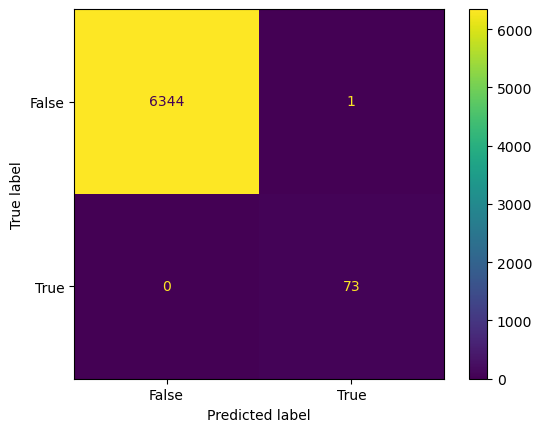

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=classification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classification.classes_)
disp.plot()

plt.show()